In [76]:
# Kelvin Lois - Ujian Analisis Data JCDS Data Science
# 25 Maret 2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

# Define Business Problem
Kota X memiliki memiliki total kuantitas penjualan yang rendah dibandingkan kota lain. 
Kota X akan ditentukan melalui analisis analisis lanjutan, yaitu bivariate dan univariate.

# Define Goals
Meningkatkan total kuantitas penjualan barang di kota X yang akan dipilih.
Peningkatan total kuantitas penjualan akan berdampak pada penigkatan total penjualan.
Goals lebih lanjut akan ditentukan produk line mana yang sebaiknya ditingkatkan kuantitas penjualnnya (di kota X) sehingga memberikan peningkatan total penjualan terbesar diantara produk lain.

In [8]:
# Check Missing Value dan Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

##### Tidak ada Missing Value

In [9]:
# Analisis Deskriptif
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [15]:
# Mencari Outliers untuk Quantity
Q1 = df.describe()['Quantity']['25%']
Q3 = df.describe()['Quantity']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [14]:
#### Cek Data Outliers
df[(df['Quantity'] < Lower_Fence) | (df['Quantity'] > Upper_Fence)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


##### Hasil pengecekan outliers : 
Tidak ada data outliers untuk kolom Quantity
Karena tidak ada outliers kita sekarang dapat membandingkan total kuantitas masing-masing kota (ada 3 kota).

Karena kita akan fokus ke kota, ingin melihat boxplot (untuk mengetahui persebaran data dan outliers)
untuk masing-masing kota.

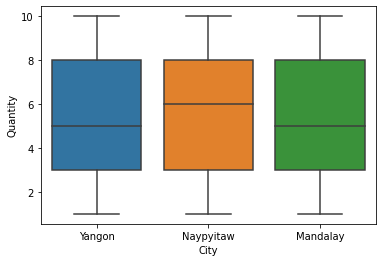

In [45]:
sns.boxplot(x = df['City'], y=df['Quantity'])
plt.show()

Kita lihat bahwa 
- tidak ada outliers pada setiap kota
- median kota Naypyitw sedikit lebih tinggi
- persebaran jlh kuantitas hampir seragam untuk tiap kota

### Analisis Data (Univariate dan Multivariate)

In [27]:
# Kita cari kota mana yang ingin ditingkatkan total kuantitas penjualannya dengan :
pd.crosstab(index = df['City'], columns = "total_quantity", values=df['Quantity'], aggfunc='sum')

col_0,total_quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


**Total Penjualan pada masing-masing kota ternyata sama**. Tetapi seperti yang terlihat dibawah ini, 
penyumbang terhadap total kuantitas pnejualan untuk kota Naypyitaw tidak seimbang untuk kedua gender 
dibandingkan dengan kota-kota lain. Gender male memliki total kuantitas penjualan yang lebih kecil dibandingkan kota lain. Jadi kita akan mencoba meningkatkan total kuantitas penjualan
untuk gender Male pada kota Naypyitaw.

In [26]:
pd.crosstab(index = [df['City'], df['Gender']], columns = "total_quantity", values=df['Quantity'], aggfunc='sum')

col_0             total_quantity
City      Gender                
Mandalay  Female             911
          Male               909
Naypyitaw Female            1049
          Male               782
Yangon    Female             909
          Male               950

Sekarang kita akan mencari tahu kenapa kuantitas penjualan di kota Naypyitaw untuk gender male kecil lewat 
jenis produk line yang terjual. Pertama lewat pembandingan produk line di tiap kota. 

**HIPOTESA 1:** apakah produk line yang sesuai untuk gender male di kota Naypyitaw lebih sedikit dibanding kota lain? hipotesa dapat dijawab dengan hasil berikut:

In [35]:
df[df['City'] == 'Naypyitaw']['Product line'].unique()

array(['Electronic accessories', 'Home and lifestyle',
       'Food and beverages', 'Sports and travel', 'Health and beauty',
       'Fashion accessories'], dtype=object)

In [36]:
df[df['City'] == 'Yangon']['Product line'].unique()

array(['Health and beauty', 'Home and lifestyle', 'Sports and travel',
       'Electronic accessories', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [37]:
df[df['City'] == 'Mandalay']['Product line'].unique()

array(['Food and beverages', 'Fashion accessories',
       'Electronic accessories', 'Sports and travel',
       'Home and lifestyle', 'Health and beauty'], dtype=object)

__Jawab hipotesa 1__ : _Ternyata produk line yang dijual sama saja untuk setiap kota/brach (satu kota satu branch)_ Jadi tidak ada rekomendasi

__HIPOTESA 2__ : Kuantitas penjualan untuk gender male, lebih sedikit di kota Naypyitaw adalah karena produk line yang diminati oleh gender male (Electronic accessories/Home and lifestyle/Sports and travel) terjual lebih sedikit dibandingkan gender female ? Jawaban hipotesa dapat diperoleh dengan hasil berikut:

In [40]:
dg  = df[df['City'] == 'Naypyitaw']
pd.crosstab(index = dg['Gender'], columns = dg['Product line'], values = dg['Quantity'], aggfunc='sum').round(2)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,164,192,231,120,152,190
Male,169,150,138,157,93,75


__Saran/Rekomendasi__ : Adakan promo atau iklan untuk produk line yang kurang diminati gender male seperti **Sports and travel, Home and lifestyle, Food and beverages, Fashion accessories**. Yang anehnya disini adalah produk yang seharusnya diminati male terjual lebih sedikit (Sports and Travel) dah produk yang seharusnya tidak diminati male terjual lebih banyak (Health and Beauty)

**__HIPOTESA 3__ :** Jumlah member gender male lebih sedikit dibandig female? (Asumsi member lebih sering membeli dibandingkan non-member).
    Bila kita dapat meningkatkan jumlah member male, otomatis kuantitas penjualan male akan naik. Kita periksa dengan tabel berikut :

In [42]:
dg  = df[df['City'] == 'Naypyitaw']
pd.crosstab(index = dg['Gender'], columns = dg['Customer type'], values = dg['Customer type'], aggfunc='count')

Customer type,Member,Normal
Gender,,
Female,96,82
Male,73,77


__Saran/Rekomendasi__ : Kita tingkatkan kuantitas penjualan male dengan meningkatkan jumlah member male. 
Caranya misalkan kita berikan potongan harga untuk product line yang __sering dibeli/diminati__ gender male, apabila
customer terdaftar sebagai member. Product line yang __sering dibeli/diminati__ gender male berdasarkan tabel sebelumnya adalah **Electronic accessories** dan **Health and beauty**

In [49]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
# Membuat Plot total quantity gender male berdasarkan tanggal

In [68]:
dg  = df[df['City'] == 'Naypyitaw']
dh = dg[dg['Gender'] == 'Male']
DF = pd.crosstab(index = dh['Date'], columns = 'total_quantity', values = dh['Quantity'], aggfunc='sum')
DF.head()

col_0,total_quantity
Date,
1/1/2019,2
1/10/2019,14
1/12/2019,17
1/14/2019,22
1/15/2019,22


<AxesSubplot:xlabel='Date'>

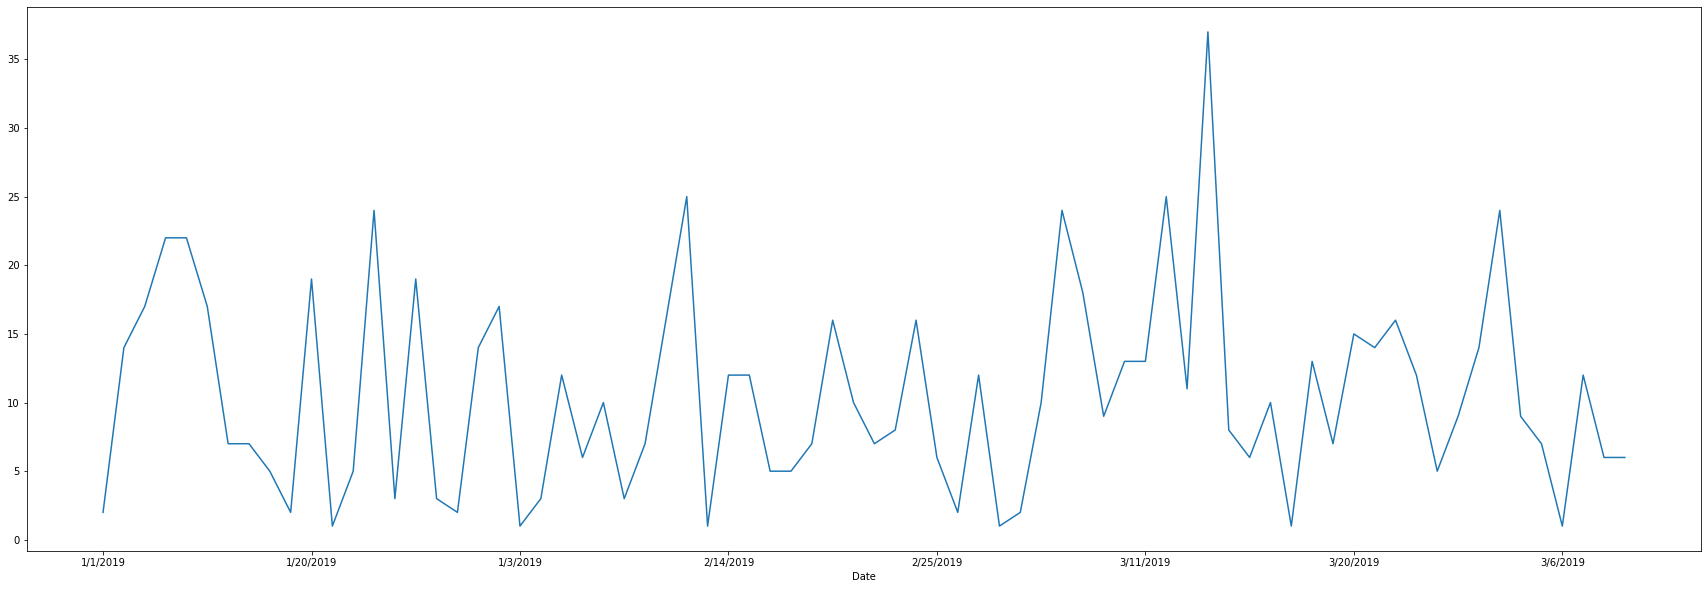

In [73]:
plt.figure(figsize=(30,10))
DF['total_quantity'].plot.line(x=None, y=None)


In [74]:
# Tujuannya ingin dilihat pada tanggal berapa penjualan sangat kecil untuk gender male dan kapan penjualan down. 

### Kesimpulan dan Saran
- Adakan promo atau iklan untuk produk line yang kurang diminati gender male seperti **Sports and travel, Home and lifestyle, Food and beverages, Fashion accessories**. Yang anehnya disini adalah produk yang seharusnya diminati male terjual lebih sedikit (Sports and Travel) dah produk yang seharusnya tidak diminati male terjual lebih banyak (Health and Beauty)

- Kita tingkatkan kuantitas penjualan male dengan meningkatkan jumlah member male. Caranya misalkan kita berikan potongan harga untuk product line yang __sering dibeli/diminati__ gender male, apabila customer terdaftar sebagai member. Product line yang __sering dibeli/diminati__ gender male berdasarkan tabel sebelumnya adalah **Electronic accessories** dan **Health and beauty**